In [ ]:
                                                               #ICP -7
                                                                                                            #v v S Murthy Kolla
                                                                                                            #700729142

In [ ]:
#Follow the instruction below and then report how the performance changed.(apply all at once)
#• Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.
###• Max Pool layer with size 2×2.
#• Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
##• Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
#• Max Pool layer with size 2×2.
#• Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
#• Dropout layer at 20%.
#• Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function.
#• Max Pool layer with size 2×2.
#• Flatten layer.
#• Dropout layer at 20%.
#• Fully connected layer with 1024 units and a rectifier activation function.
#• Dropout layer at 20%.
#• Fully connected layer with 512 units and a rectifier activation function.
#• Dropout layer at 20%.
#• Fully connected output layer with 10 units and a Softmax activation function

In [3]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.optimizers import SGD

# Fix random seed for reproducibility
np.random.seed(7)

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 50
learning_rate = 0.001
decay_rate = learning_rate / epochs
sgd = SGD(lr=learning_rate, momentum=0.9, decay=decay_rate, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_12 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 dropout_13 (Dropout)        (None, 16, 16, 64)        0         
                                                      

In [ ]:
#2. Predict the first 4 images of the test data using the above model. Then, compare with the actual label for those 4
#images to check whether or not the model has predicted correctly.

In [7]:
# Predicting the first 4 images of the test data
predictions = model.predict(X_test[:4])
# Converting the predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
# Converting the actual labels to class labels
actual_labels = np.argmax(y_test[:4], axis=1)

# Printing the predicted and actual labels for the first 4 images
print("Actual labels:   ", actual_labels)
print("Predicted labels:", predicted_labels)

1/1 [==============================] - 0s 28ms/step
Actual labels:    [3 8 8 0]
Predicted labels: [3 8 8 0]


In [ ]:
#3. Visualize Loss and Accuracy using the history object

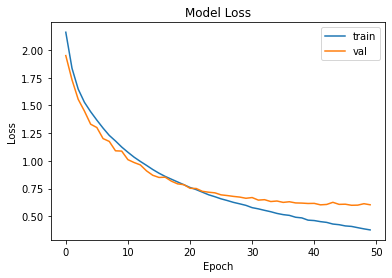

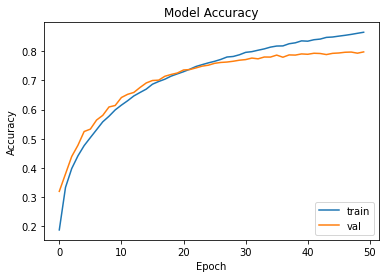

In [8]:
import matplotlib.pyplot as plt

# plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [10]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 16.5 MB/s eta 0:00:00


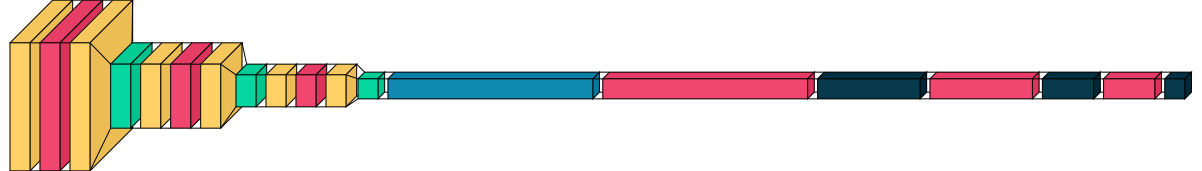

In [11]:
#visualize the neural network model,
import visualkeras
visualkeras.layered_view(model)

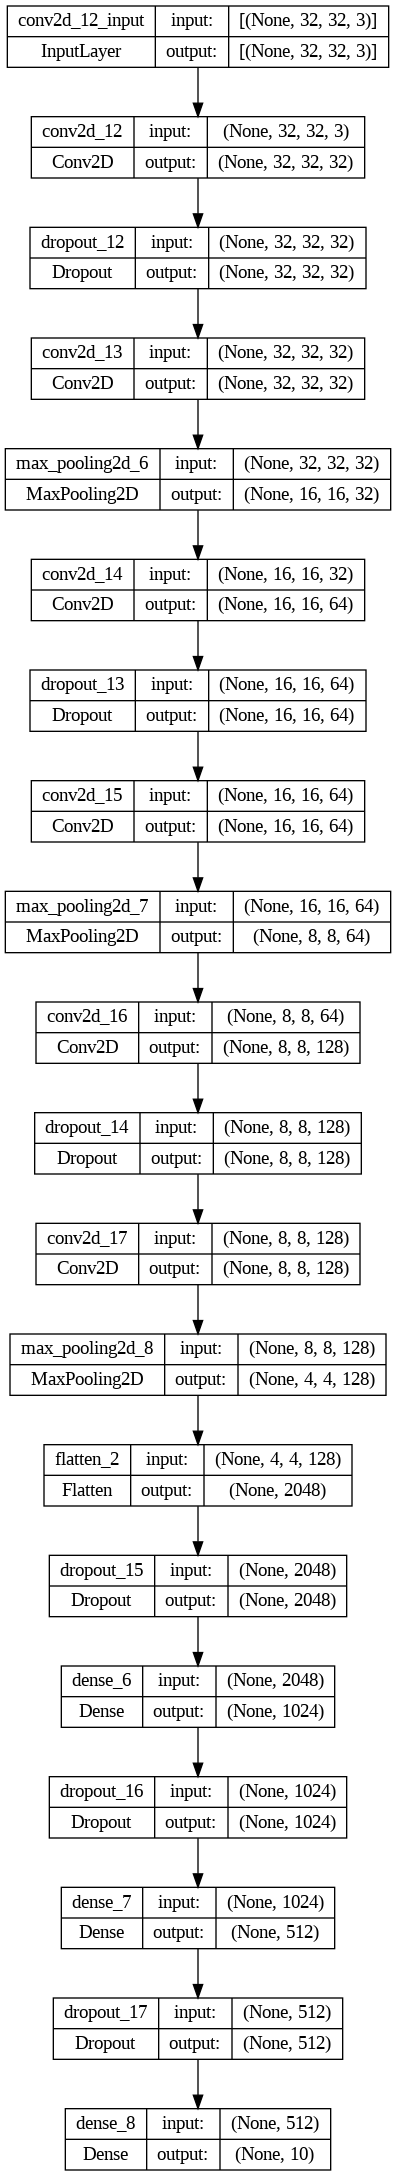

In [16]:
#We can display the generated image using the following command.
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)